# Complete Regression Model Training
This notebook trains the regression model with ALL features specified in the original requirements.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('../data/processed/cleaned_rentals_25k.csv')
print(f"Dataset loaded with shape: {df.shape}")
df.head()

Dataset loaded with shape: (25293, 169)


,rentfaster_id,city,province,address,latitude,longitude,price,beds,baths,sq_feet,...,availability_date_September 14,availability_date_September 15,availability_date_September 19,availability_date_September 29,availability_date_September 30,smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed,cats_True,dogs_True
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,2495.0,2.0,2.5,1403.0,...,False,False,False,False,False,True,False,False,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,2695.0,3.0,2.5,1496.0,...,False,False,False,False,False,True,False,False,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,2295.0,2.0,2.5,1180.0,...,False,False,False,False,False,True,False,False,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,2095.0,2.0,2.5,1403.0,...,False,False,False,False,False,True,False,False,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,2495.0,2.0,2.5,1403.0,...,False,False,False,False,False,True,False,False,True,True


In [3]:
# Basic preprocessing
df = df[df['price'] <= 7000]  # keep it manageable
df = df[df['price'] >= 100]   # remove listings with price of $0

print(f"After price filtering: {df.shape}")

After price filtering: (25293, 169)


In [4]:
# Define ALL features as specified in original requirements
# Note: using 'sq_feet' from dataset (equivalent to 'sq_ft' in requirements)
cols_to_keep = [
    "sq_feet", "beds", "baths", "type_Townhouse", "furnishing_Negotiable", "furnishing_Unfurnished",
    "type_Basement", "type_Condo Unit", "type_Main Floor", "latitude", "longitude", "price",
    "smoking_Non-Smoking", "smoking_Smoke Free Building", "cats_True", "dogs_True",
    "lease_term_6 months", "lease_term_Long Term", "lease_term_Negotiable", "lease_term_Short Term"
]

# Keep only available columns and drop NaN
available_cols = [col for col in cols_to_keep if col in df.columns]
df_clean = df[available_cols].dropna()

print(f"Final dataset shape: {df_clean.shape}")
print(f"Features included: {[col for col in available_cols if col != 'price']}")

Final dataset shape: (25293, 20)
Features included: ['sq_feet', 'beds', 'baths', 'type_Townhouse', 'furnishing_Negotiable', 'furnishing_Unfurnished', 'type_Basement', 'type_Condo Unit', 'type_Main Floor', 'latitude', 'longitude', 'smoking_Non-Smoking', 'smoking_Smoke Free Building', 'cats_True', 'dogs_True', 'lease_term_6 months', 'lease_term_Long Term', 'lease_term_Negotiable', 'lease_term_Short Term']


In [5]:
# Prepare features and target
y = df_clean['price']
X = df_clean[[col for col in available_cols if col != 'price']]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features: {list(X.columns)}")

Feature matrix shape: (25293, 19)
Target vector shape: (25293,)
Features: ['sq_feet', 'beds', 'baths', 'type_Townhouse', 'furnishing_Negotiable', 'furnishing_Unfurnished', 'type_Basement', 'type_Condo Unit', 'type_Main Floor', 'latitude', 'longitude', 'smoking_Non-Smoking', 'smoking_Smoke Free Building', 'cats_True', 'dogs_True', 'lease_term_6 months', 'lease_term_Long Term', 'lease_term_Negotiable', 'lease_term_Short Term']


In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (20234, 19), Testing set: (5059, 19)


In [7]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


In [8]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"  MAE : {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²  : {r2:.3f}")

Model Evaluation Metrics:
  MAE : 396.18
  RMSE: 571.19
  R²  : 0.492


In [9]:
# Feature importance
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance (Coefficients):")
print(coefficients)


Feature Importance (Coefficients):
                        Feature  Coefficient
18        lease_term_Short Term   542.021892
2                         baths   423.567144
7               type_Condo Unit   372.713959
15          lease_term_6 months   324.011087
14                    dogs_True   185.564874
1                          beds   171.823827
16         lease_term_Long Term   104.693463
13                    cats_True    40.764560
17        lease_term_Negotiable    26.926256
0                       sq_feet     0.318503
10                    longitude   -14.670848
8               type_Main Floor   -38.026486
12  smoking_Smoke Free Building   -48.966236
5        furnishing_Unfurnished   -58.114042
3                type_Townhouse   -89.673030
9                      latitude  -148.384958
6                 type_Basement  -159.549398
4         furnishing_Negotiable  -160.431755
11          smoking_Non-Smoking  -162.912980


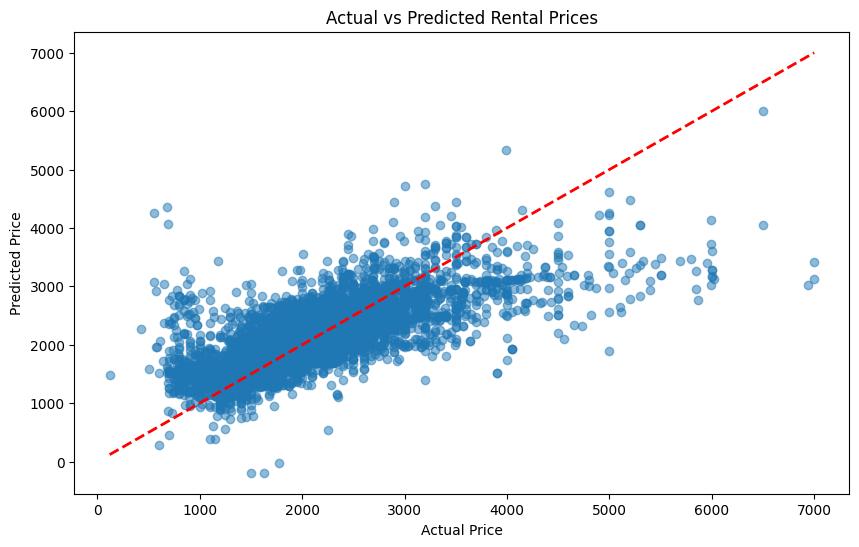

In [10]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Rental Prices')
plt.show()

In [11]:
# Save the model
joblib.dump(model, '../models/complete_regression_model.pkl')
print("Model saved as 'complete_regression_model.pkl'")

# Also save feature names for reference
feature_names = list(X.columns)
joblib.dump(feature_names, '../models/regression_feature_names.pkl')
print(f"Feature names saved. Total features: {len(feature_names)}")
print(f"Features: {feature_names}")

Model saved as 'complete_regression_model.pkl'
Feature names saved. Total features: 19
Features: ['sq_feet', 'beds', 'baths', 'type_Townhouse', 'furnishing_Negotiable', 'furnishing_Unfurnished', 'type_Basement', 'type_Condo Unit', 'type_Main Floor', 'latitude', 'longitude', 'smoking_Non-Smoking', 'smoking_Smoke Free Building', 'cats_True', 'dogs_True', 'lease_term_6 months', 'lease_term_Long Term', 'lease_term_Negotiable', 'lease_term_Short Term']
